# Project - Walmart Weekly Sales Forecast 

## Group 11 



In [1]:
# Importing pandas and numpy
import numpy as np
import pandas as pd

In [2]:
# Creating the dataframes using pd.read_csv()
train=pd.read_csv("https://raw.githubusercontent.com/Group11DSproject/Walmart-Sales-Forecasting/main/train.csv") 
stores=pd.read_csv("https://raw.githubusercontent.com/Group11DSproject/Walmart-Sales-Forecasting/main/stores.csv") 
features=pd.read_csv("https://raw.githubusercontent.com/Group11DSproject/Walmart-Sales-Forecasting/main/features.csv")

### Displaying the datasets description

In [3]:
# Display the dataframe
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


In [4]:
#Display rows and columns
train.shape

(421570, 5)

In [5]:
# Column wise description
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
stores.shape

(45, 3)

In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
features.shape

(8190, 12)

In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [12]:
# Checking for the null values in feature dataset
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [13]:
# Finding the median of the feature which has null values
features['CPI'].median()

182.7640032

In [14]:
# Finding the mode of the feature which has null values
features['CPI'].mode()

0    132.716097
dtype: float64

In [15]:
# Finding the median of the feature which has null values
features['Unemployment'].median()

7.806

In [16]:
# Finding the mode of the feature which has null values
features['Unemployment'].mode()

0    8.099
dtype: float64

In [17]:
# filling the missing values with mode(most repeating values)
features['CPI'].fillna(features['CPI'].mode()[0], inplace = True)
features['Unemployment'].fillna(features['Unemployment'].mode()[0],inplace=True)

In [18]:
# Displaying the Markdown1 unique number of values
features['MarkDown1'].value_counts().nunique()

2

In [19]:
# Filling the missing values in Markdown 1-5 as 0
for i in range(1,6):
    features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [20]:
# Checking for null values again after filling the missing values
features.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [21]:
# Merging the [Train,Stores,Features] datasets on the Store and Date columns
df = pd.merge(train,stores,on='Store',how='left')
df = pd.merge(df,features,on=['Store','Date'],how='left')

In [22]:
# Displaying the merged dataset description
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [23]:
# Dropping duplicate column isHoliday
df.drop(['IsHoliday_y'], axis=1,inplace=True) 

# Renaming the IsHoliday_x column as IsHoliday
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2/5/2010,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2/12/2010,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2/19/2010,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2/26/2010,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,3/5/2010,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [24]:
# Computing the number of unique values in all the columns/features
unique_vals = {}
for col in df.columns:
    unique_vals[col] = df[col].value_counts().shape[0]

# Displaying the value counts using a dataframe
pd.DataFrame(unique_vals, index=['Value Counts']).transpose()

,Value Counts
Store,45
Dept,81
Date,143
Weekly_Sales,359464
IsHoliday,2
Type,3
Size,40
Temperature,3528
Fuel_Price,892
MarkDown1,2278


In [25]:
# Displaying the mean weekly sales using store and dept wise pivot table 
store_dept_pivot = pd.pivot_table(df, index='Store', columns='Dept',values='Weekly_Sales')

store_dept_pivot.head()

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN


In [26]:
# Checking for the negative weekly sales if any (Sales cannot be negative so dropping)
neg_weekly_sales = df.loc[df['Weekly_Sales']<=0]
neg_weekly_sales.shape

(1358, 16)

We can see there are 1358 rows out of 421570 rows where weekly sales are negative, So we can drop them

In [27]:
# Dropping the rows with negative weekly sales
df = df.loc[df['Weekly_Sales'] > 0]
df.shape

(420212, 16)

In [28]:
# Changing the date column into datetime data type
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

# Because it is a weekly sales data, We sort the dataset using the datetime
df.sort_values(by=['Date'],inplace=True)
df.reset_index(inplace = True)
df.drop("index", inplace = True, axis = 1)
df.index = np.arange(1, len(df) + 1)

In [29]:
# Displaying the date column
df['Date']

1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
5        2010-02-05
            ...    
420208   2012-10-26
420209   2012-10-26
420210   2012-10-26
420211   2012-10-26
420212   2012-10-26
Name: Date, Length: 420212, dtype: datetime64[ns]

### Visualization of the Data

In [30]:
# importing the visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

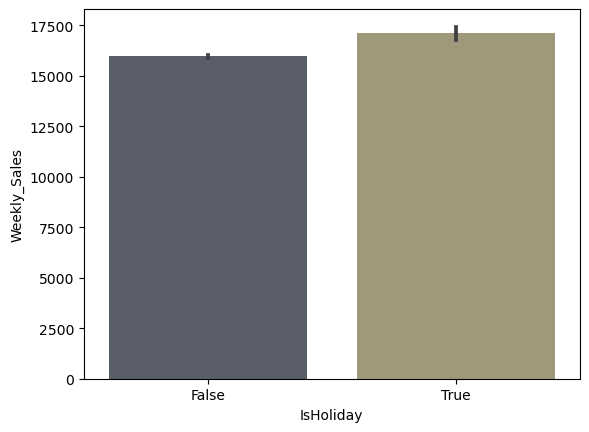

In [31]:
# Barplot to see the weekly sales on Holiday and Non Holiday week
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df, palette="cividis" )
plt.savefig("Holiday_Sales.png")

In [32]:
# Checking for the number of holiday weeks in the dataset
holiday = df.loc[df['IsHoliday']==True]
print("Number of Holiday Weeks are: " + str(holiday['Date'].nunique()))

Number of Holiday Weeks are: 10


In [33]:
# Checking for the number of Non-holiday weeks in the dataset
non_holiday = df.loc[df['IsHoliday']==False]
print("Number of Non-Holiday Weeks are: " + str(non_holiday['Date'].nunique()))

Number of Non-Holiday Weeks are: 133


In [34]:
# Displaying the holiday weeks

holiday["Date"].dt.date.unique()

array([datetime.date(2010, 2, 12), datetime.date(2010, 9, 10),
       datetime.date(2010, 11, 26), datetime.date(2010, 12, 31),
       datetime.date(2011, 2, 11), datetime.date(2011, 9, 9),
       datetime.date(2011, 11, 25), datetime.date(2011, 12, 30),
       datetime.date(2012, 2, 10), datetime.date(2012, 9, 7)],
      dtype=object)

### Creating a new columns for the holiday weeks as they are one of the important factors

In [35]:
# Creating Christmas holiday column for the below dates  
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

In [36]:
# Creating Labor Day holiday column for the below dates
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [37]:
# Creating Super Bowl holiday column for the below dates
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [38]:
# Creating Thanksgiving holiday column for the below dates
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [39]:
# Adding the week,month and year columns using the datetime function
df['week'] = df['Date'].dt.week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [40]:
# Displaying the dataset after doing the above changes
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown5,CPI,Unemployment,Christmas,Labor_Day,Super_Bowl,Thanksgiving,week,month,year
1,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,...,0.0,211.096358,8.106,False,False,False,False,5,2,2010
2,15,21,2010-02-05,3253.19,False,B,123737,19.83,2.954,0.0,...,0.0,131.527903,8.350,False,False,False,False,5,2,2010
3,15,20,2010-02-05,4606.90,False,B,123737,19.83,2.954,0.0,...,0.0,131.527903,8.350,False,False,False,False,5,2,2010
4,15,19,2010-02-05,1381.40,False,B,123737,19.83,2.954,0.0,...,0.0,131.527903,8.350,False,False,False,False,5,2,2010
5,15,18,2010-02-05,2239.25,False,B,123737,19.83,2.954,0.0,...,0.0,131.527903,8.350,False,False,False,False,5,2,2010


In [41]:
# Comparing Store Types and computing their percentage
type_per = df['Type'].value_counts()
type_per = round(type_per/type_per.sum() * 100)
percentage_type = list(type_per)

# Types of Stores
type_per.index

Index(['A', 'B', 'C'], dtype='object')

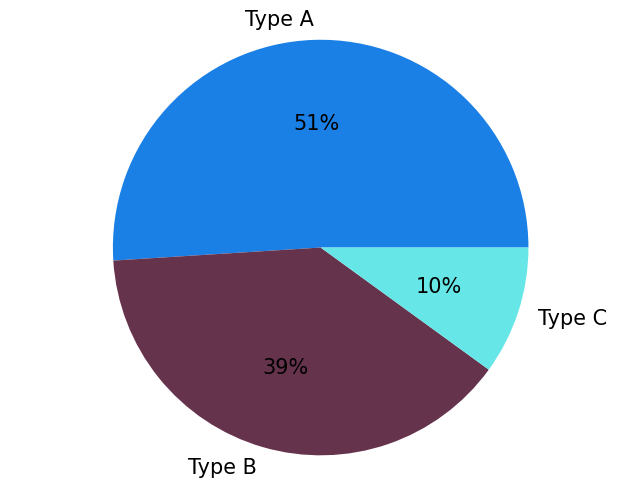

In [42]:
# Displaying the Percentages for each store type
type_labels = 'Type A','Type B', 'Type C' # labels
plt.figure(figsize=(8,6))
plt.pie(percentage_type, labels=type_labels, autopct='%1.0f%%', textprops={'fontsize': 15}, colors= [[0.1,0.5,0.9],[0.4,0.2,0.3],[0.4,0.9,0.9]] ) #plot pie type and bigger the labels
plt.axis('equal')
plt.savefig("Store_Types.png")
plt.show()

In [43]:
# Average weekly sales for each type of stores
df.groupby("Type")["Weekly_Sales"].mean()
weekly_sales = df.groupby("Type")["Weekly_Sales"].mean()
weekly_sales

Type
A    20148.108162
B    12290.549297
C     9549.454168
Name: Weekly_Sales, dtype: float64

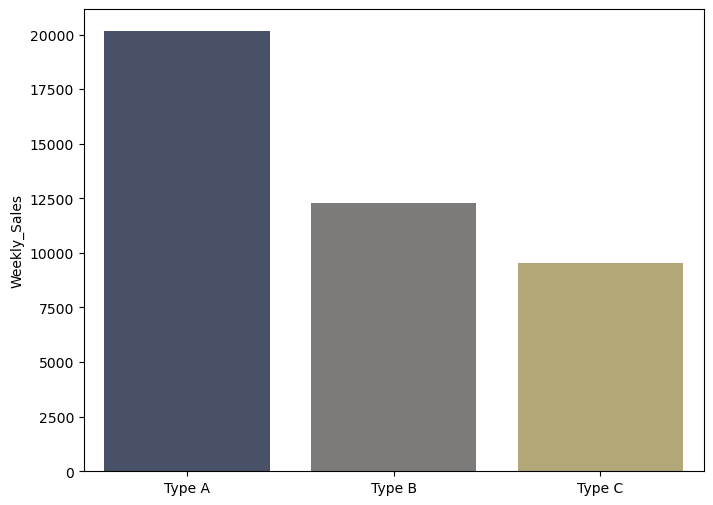

In [44]:
# Visulaizing the average weekly sales for Types of stores
plt.figure(figsize=(8,6))
fig = sns.barplot(x=["Type A", "Type B", "Type C"], y = weekly_sales, palette="cividis" )
plt.savefig("Type_Sales.png")

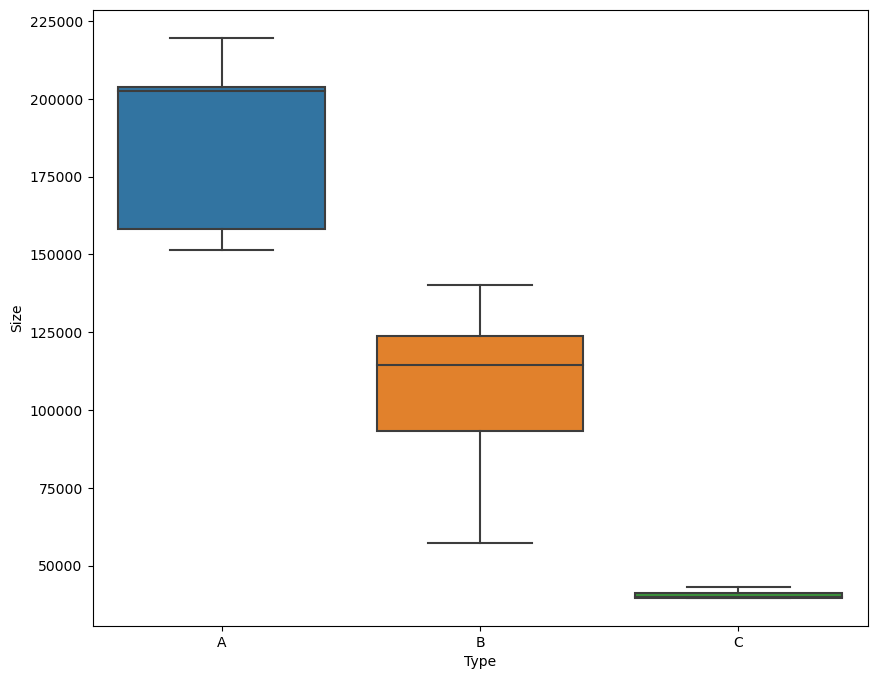

In [45]:
# Visulaizing the Type and Size columns relation
plt.figure(figsize=(10,8))
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)
plt.savefig("Type_Size.png")

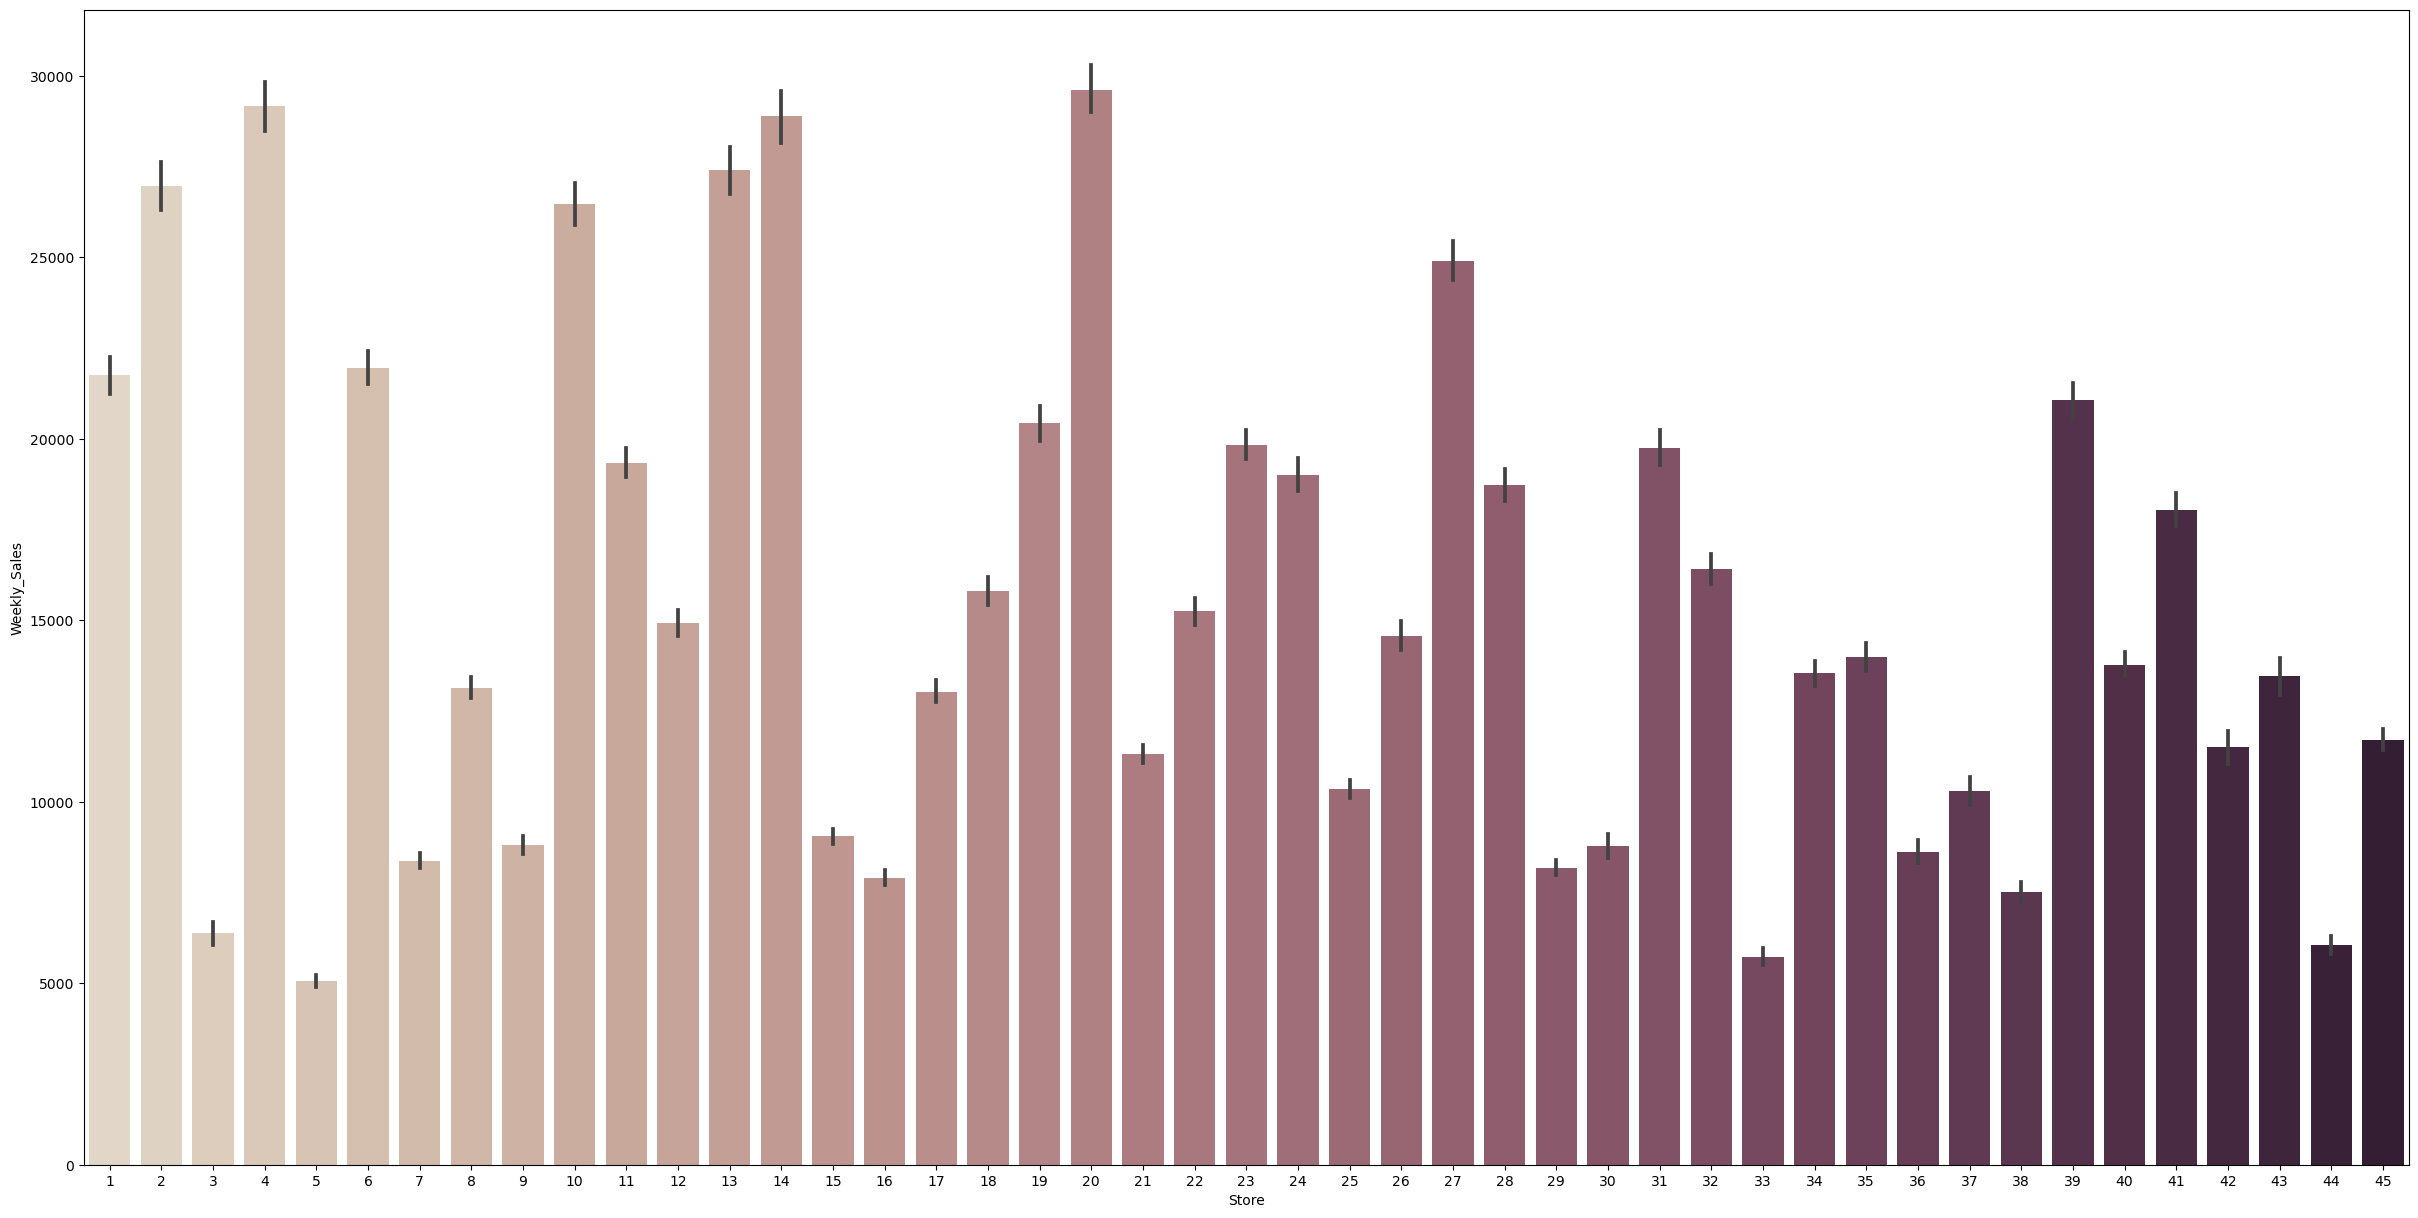

In [46]:
# Visualizing the Store wise Weekly sales 
plt.figure(figsize=(30,15))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df, palette="ch:.25")
plt.savefig("Store_Sales.png")

In [47]:
# Calculating the average weekly sales on each holiday week
hol_1 = round(df.groupby("Super_Bowl")["Weekly_Sales"].mean()[1])
hol_2 = round(df.groupby("Labor_Day")["Weekly_Sales"].mean()[1])
hol_3 = round(df.groupby("Thanksgiving")["Weekly_Sales"].mean()[1])
hol_4 = round(df.groupby("Christmas")["Weekly_Sales"].mean()[1])

holiday_sales = [hol_1,hol_2,hol_3,hol_4]

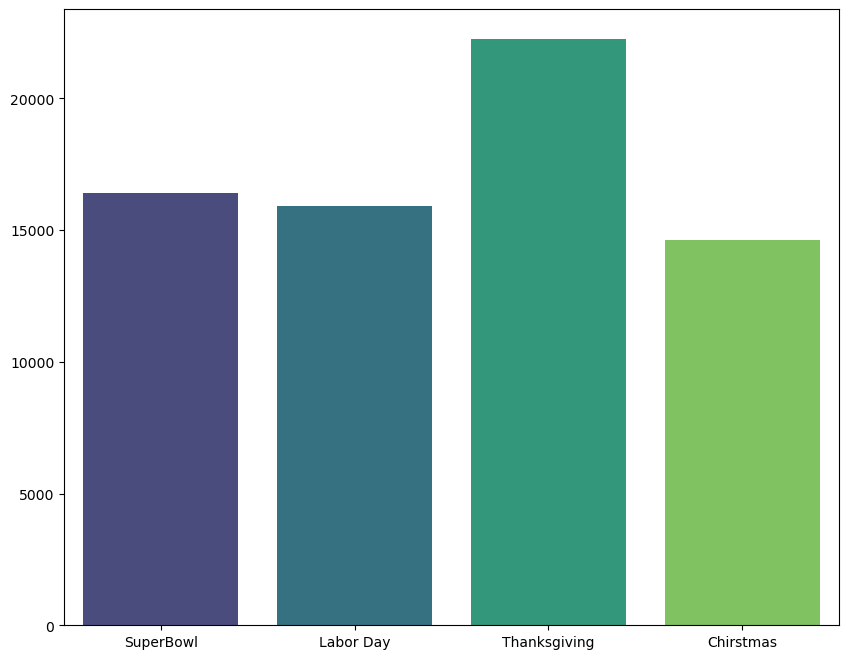

In [48]:
# Visualzing the average weekly sales on each holiday week 
plt.figure(figsize=(10,8))
fig = sns.barplot(x=["SuperBowl", "Labor Day", "Thanksgiving", "Chirstmas"], y=holiday_sales, palette="viridis")
plt.savefig("Holiday_Sales.png")

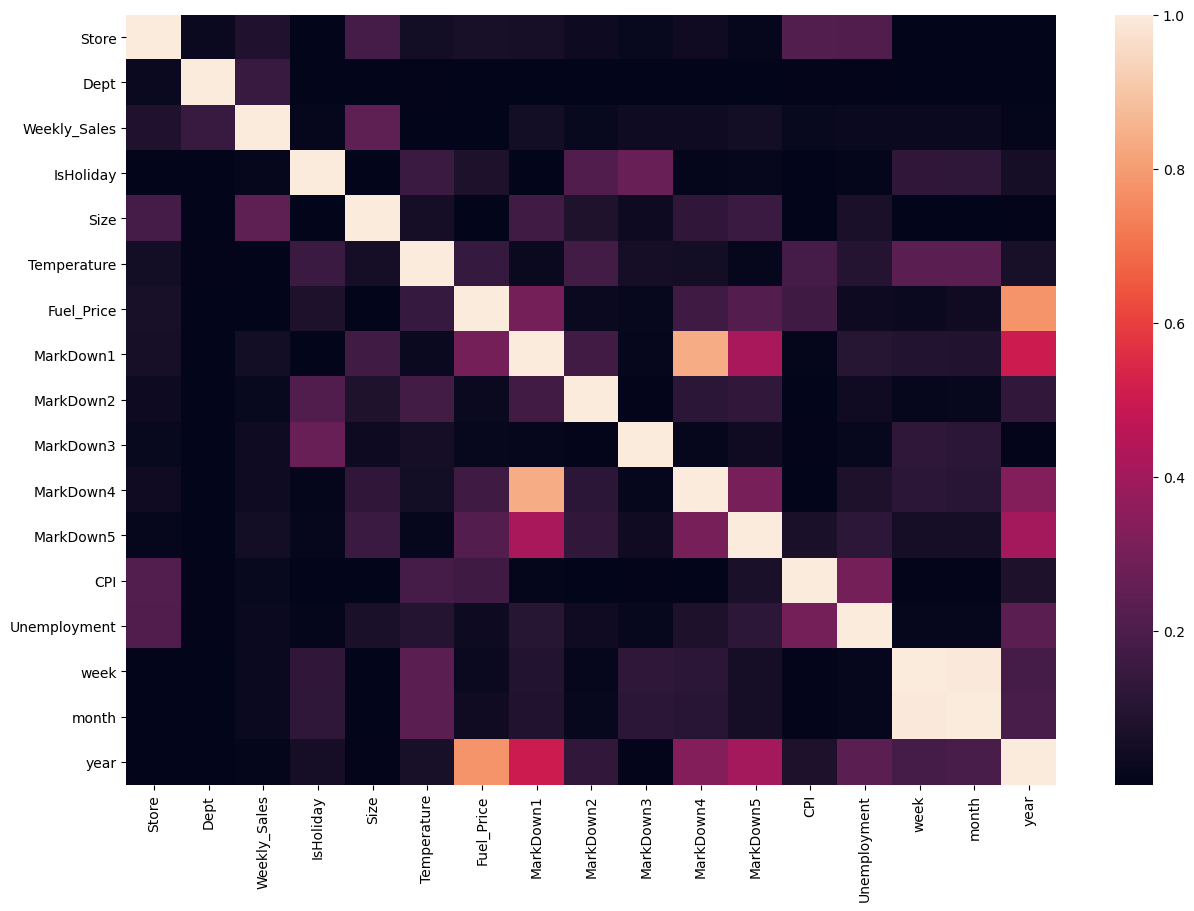

In [49]:
# Correlations between different features using the heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df.corr().abs()) 
plt.savefig("Correlation.png")
plt.show()

In [50]:
# Markdown Data are correlated to each other hence combining all the Markdown Data 
df['Total_MarkDown'] = df['MarkDown1'] + df['MarkDown2'] + df['MarkDown3'] + df['MarkDown4'] + df['MarkDown5']
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Christmas,Labor_Day,Super_Bowl,Thanksgiving,week,month,year,Total_MarkDown
1,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False,False,False,False,5,2,2010,0.0
2,15,21,2010-02-05,3253.19,False,B,123737,19.83,2.954,131.527903,8.350,False,False,False,False,5,2,2010,0.0
3,15,20,2010-02-05,4606.90,False,B,123737,19.83,2.954,131.527903,8.350,False,False,False,False,5,2,2010,0.0
4,15,19,2010-02-05,1381.40,False,B,123737,19.83,2.954,131.527903,8.350,False,False,False,False,5,2,2010,0.0
5,15,18,2010-02-05,2239.25,False,B,123737,19.83,2.954,131.527903,8.350,False,False,False,False,5,2,2010,0.0


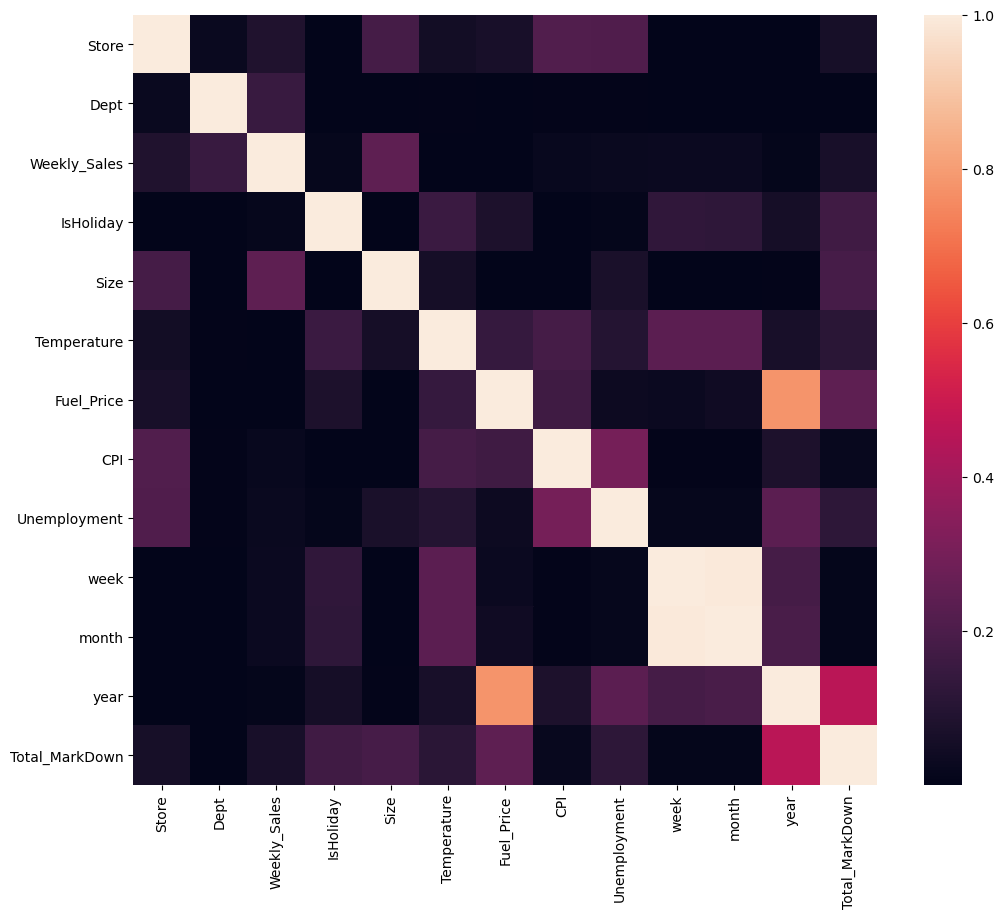

In [51]:
# Checking the corrleation again after dropping the markdown columns
plt.figure(figsize = (12,10))
sns.heatmap(df.corr().abs())
plt.savefig("Correlation_2.png")
plt.show()

We can see that the year and Fuel Price are highly correlated

In [52]:
# Calculating the average fuel price for different years
year_fuel = df.groupby("year")['Fuel_Price'].mean()
year_fuel

year
2010    2.823799
2011    3.563293
2012    3.710311
Name: Fuel_Price, dtype: float64

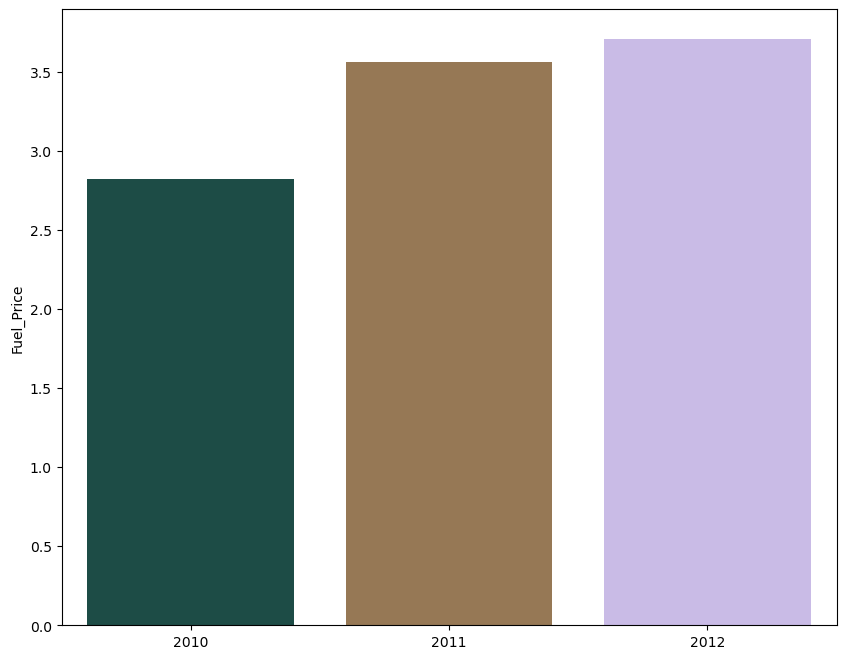

In [53]:
# Visualzing the average fuel price for different years
plt.figure(figsize=(10,8))
fig = sns.barplot(x=["2010","2011", "2012"], y=year_fuel, palette="cubehelix")
plt.savefig("Fuel_Price.png")

### One-Hot Encoding on below catergorical features

In [54]:
# Storing the caterogical and numerical features for further processing
categorical_features = ["Type", "Christmas", "Labor_Day", "Super_Bowl","Thanksgiving","IsHoliday"]
numerical_features = df.select_dtypes(exclude = ["object", "bool"])

In [55]:
# Displaying the numercial Features
numerical_features

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,Total_MarkDown
1,1,1,2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,5,2,2010,0.00
2,15,21,2010-02-05,3253.19,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.00
3,15,20,2010-02-05,4606.90,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.00
4,15,19,2010-02-05,1381.40,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.00
5,15,18,2010-02-05,2239.25,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420208,18,52,2012-10-26,2226.10,120653,56.09,3.917,138.728161,8.243,43,10,2012,7401.20
420209,36,16,2012-10-26,564.50,39910,74.39,3.494,222.113657,6.228,43,10,2012,1260.55
420210,41,92,2012-10-26,131128.24,196321,41.80,3.686,199.219532,6.195,43,10,2012,6787.91
420211,18,81,2012-10-26,14036.52,120653,56.09,3.917,138.728161,8.243,43,10,2012,7401.20


In [56]:
# Performing the one hot encoding on categorical features
cat_feature_matrix = pd.get_dummies(df[categorical_features], columns = categorical_features,  drop_first = True)
cat_feature_matrix.head()

,Type_B,Type_C,Christmas_True,Labor_Day_True,Super_Bowl_True,Thanksgiving_True,IsHoliday_True
1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0


In [57]:
# Concatinating the numerical and categorical Data
df_cleaned = pd.concat([numerical_features, cat_feature_matrix],axis=1)
df_cleaned.head()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,Total_MarkDown,Type_B,Type_C,Christmas_True,Labor_Day_True,Super_Bowl_True,Thanksgiving_True,IsHoliday_True
1,1,1,2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,5,2,2010,0.0,0,0,0,0,0,0,0
2,15,21,2010-02-05,3253.19,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.0,1,0,0,0,0,0,0
3,15,20,2010-02-05,4606.90,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.0,1,0,0,0,0,0,0
4,15,19,2010-02-05,1381.40,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.0,1,0,0,0,0,0,0
5,15,18,2010-02-05,2239.25,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.0,1,0,0,0,0,0,0


### Model Training and Predictions

In [58]:
# Because this is a weekly data which contains the datetime, We cannot randomly split the data
# We have to manually split the data into training and testing

# taking 0.75 percent data as training data
df_train = df_cleaned[:int(0.75*(len(df_cleaned)))] 

# taking 0.25 percent data as testing data
df_test = df_cleaned[int(0.75*(len(df_cleaned))):] 

In [59]:
# Splitting the data into X features and Y labels

# In the time_series data, We should drop the date column as we already have the week, month and year as columns 
# and drop labels(weekly sales) during training the model 

X_train = df_train.drop(["Weekly_Sales", "Date"], axis = 1)
X_test =  df_test.drop(["Weekly_Sales", "Date"], axis = 1)
y_train = df_train['Weekly_Sales']
y_test = df_test['Weekly_Sales']

In [60]:
# Importing all the major regression models and metrics
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler

In [61]:
# Training and testing on the DecisionTree 
dt = DecisionTreeRegressor()

model_1 = dt.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)

mae_1 = mean_absolute_error(y_test, y_pred_1)
r2_score_1 = explained_variance_score(y_test, y_pred_1)

print("MAE" , mae_1)
print("R2" , r2_score_1)

MAE 2645.063044177701
R2 0.9283001650788607


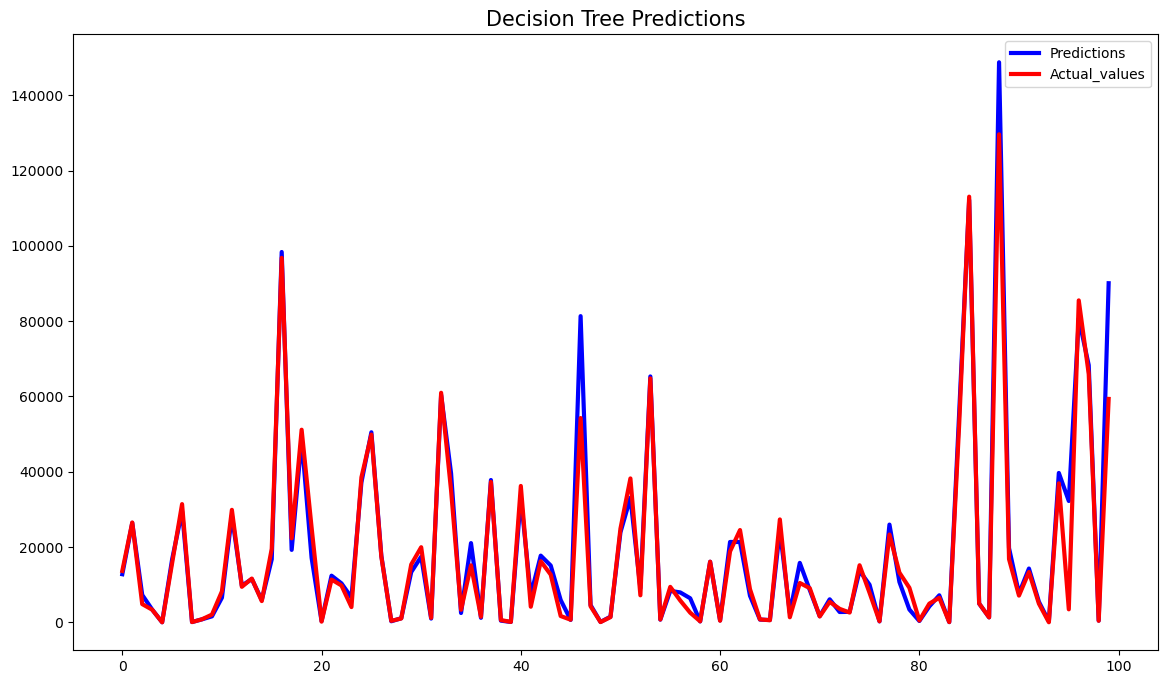

In [62]:
# Visulaizing the decision tree predictions vs actual values
plt.figure(figsize=(14,8))
plt.title('Decision Tree Predictions', fontsize=15)
plt.plot(y_pred_1[:100], label="Predictions", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label ="Actual_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.savefig('Decision_tree.png')
plt.show()

In [63]:
# Training and testing on Random Forest
rf_model2 = RandomForestRegressor()

model_2 = rf_model2.fit(X_train , y_train)
y_pred_2 = model_2.predict(X_test)


mae_2 = mean_absolute_error(y_test, y_pred_2)
r2_score_2 = explained_variance_score(y_test, y_pred_2)
print("MAE" , mae_2)
print("R2" , r2_score_2)

MAE 2045.4906577898778
R2 0.9598011097896455


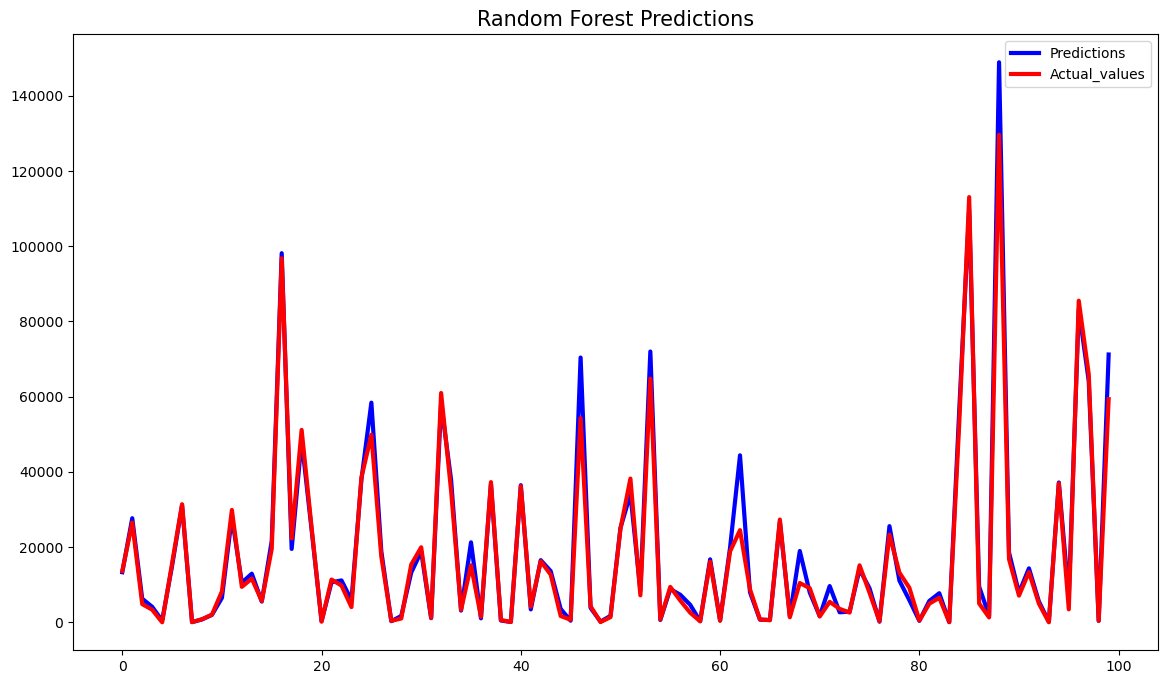

In [64]:
# Visulaizing the Random Forest predictions vs actual values
plt.figure(figsize=(14,8))
plt.title('Random Forest Predictions', fontsize=15)
plt.plot(y_pred_2[:100], label="Predictions", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label ="Actual_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.savefig('Random_Forest.png')
plt.show()

In [65]:
# Making the feature selection using randomforest feature importance 
imp_features = model_2.feature_importances_

In [66]:
# Displaying the feature importance by their rank
indices = np.argsort(imp_features)[::-1]
feature_rank = pd.DataFrame(columns = ['Rank', 'Feature', 'Importance'])

for f in range(X_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                           X_train.columns[indices[f]],
                           imp_features[indices[f]]]

feature_rank

,Rank,Feature,Importance
0,1,Dept,0.614246
1,2,Size,0.197226
2,3,Store,0.051854
3,4,week,0.032260
4,5,CPI,0.030696
5,6,Thanksgiving_True,0.021075
6,7,Unemployment,0.013549
7,8,Temperature,0.012150
8,9,Type_B,0.011104
9,10,Fuel_Price,0.005976


In [67]:
# Dropping the columns which has less importance
drop_cols = ["Super_Bowl_True", "Labor_Day_True", "year", "IsHoliday_True"]
X_train_2 = X_train.drop(drop_cols, axis = 1)
X_test_2 = X_test.drop(drop_cols, axis = 1)

In [68]:
# Again training the randomforest model using the feature selection technique
rf_model3 = RandomForestRegressor()

model_3 = rf_model3.fit(X_train_2 , y_train)

y_pred_3 = model_3.predict(X_test_2)


mae_3 = mean_absolute_error(y_test, y_pred_3)
r2_score_3 = explained_variance_score(y_test, y_pred_3)
print("MAE" , mae_3)
print("R2" , r2_score_3)

MAE 2053.1048384710575
R2 0.95932711288045


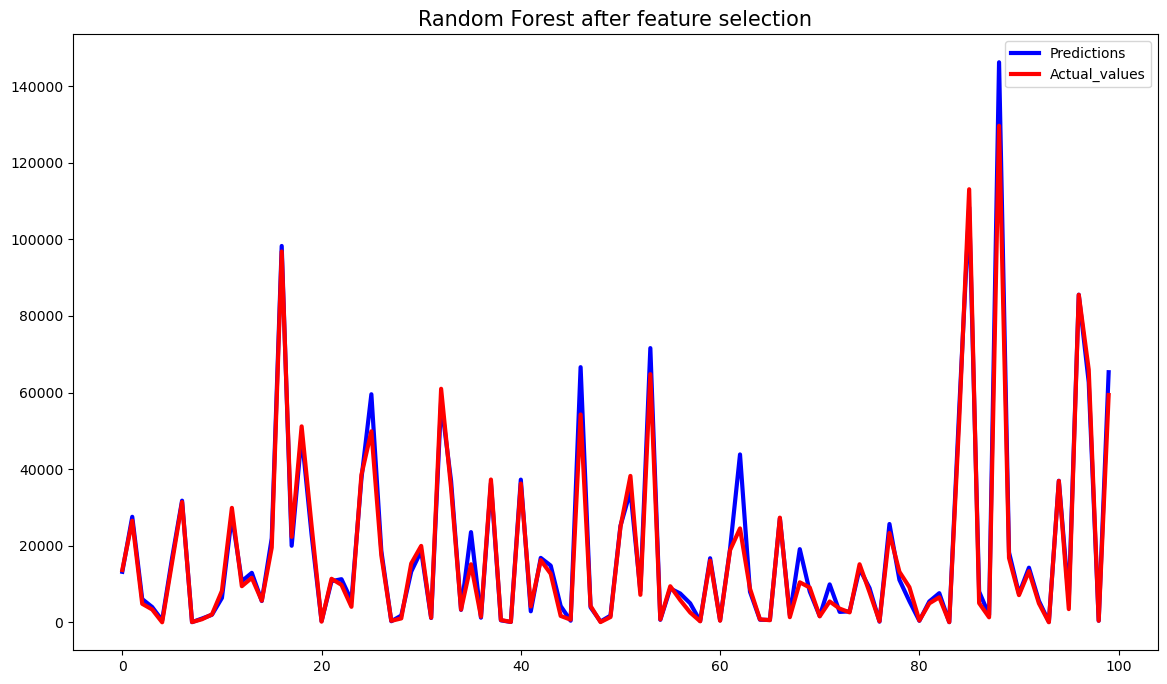

In [69]:
# Visualizing the random forest predcitions after feature selection 
plt.figure(figsize=(14,8))
plt.title('Random Forest after feature selection', fontsize=15)
plt.plot(y_pred_3[:100], label="Predictions", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label ="Actual_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.savefig('Random_feat_selections.png')
plt.show()

In [70]:
# Training the lasso regression model 
lasso_model = Lasso()

model_4 = lasso_model.fit(X_train,y_train)

y_pred_4 = model_4.predict(X_test)

mae_4 = mean_absolute_error(y_test, y_pred_4)
r2_score_4 = explained_variance_score(y_test, y_pred_4)
print("MAE" , mae_4)
print("R2" , r2_score_4)

MAE 14356.493220411616
R2 0.09546175276116087


C:\Users\zuddi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39826551473445.25, tolerance: 16589045554.893476
  model = cd_fast.enet_coordinate_descent(


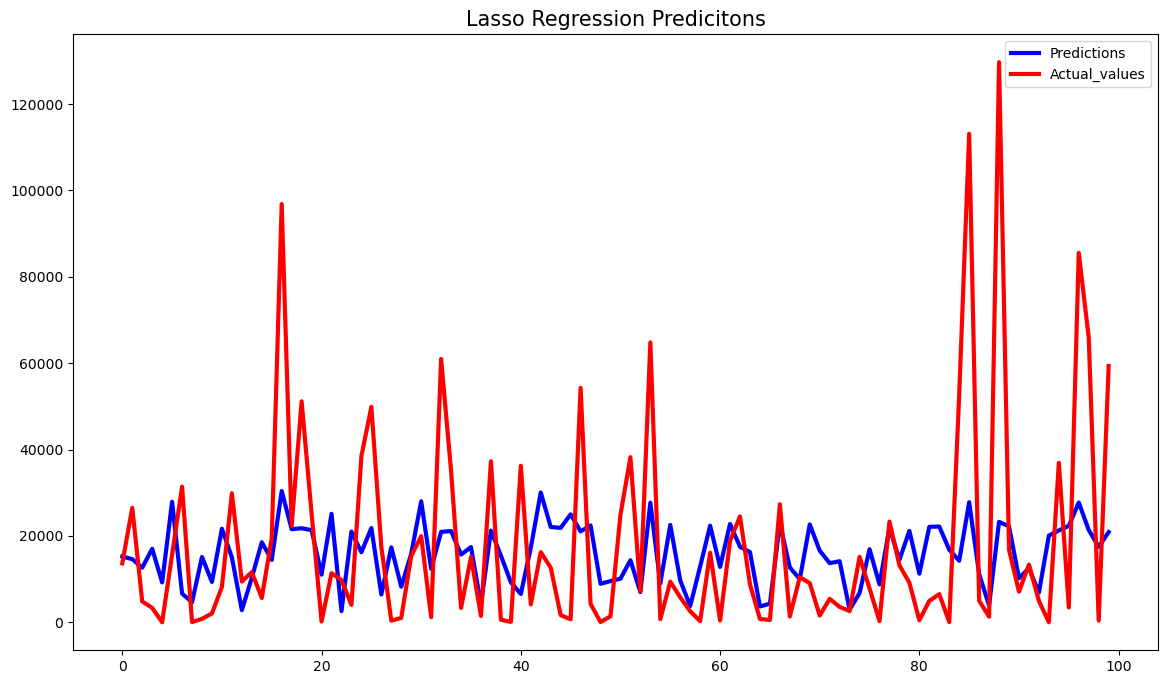

In [71]:
# Visulaizing the Lasso Reggresion predictions vs actual values
plt.figure(figsize=(14,8))
plt.title('Lasso Regression Predicitons', fontsize=15)
plt.plot(y_pred_4[:100], label="Predictions", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label ="Actual_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.savefig('model_4.png')
plt.show()

In [72]:
# Training the linear regression model
lr = LinearRegression()
model_5 = lr.fit(X_train, y_train)

y_pred_5 = model_5.predict(X_test)

mae_5 = mean_absolute_error(y_test, y_pred_5)
r2_score_5 = explained_variance_score(y_test, y_pred_5)
print("MAE" , mae_5)
print("R2" , r2_score_5)

MAE 14351.700683306091
R2 0.09546418942812318


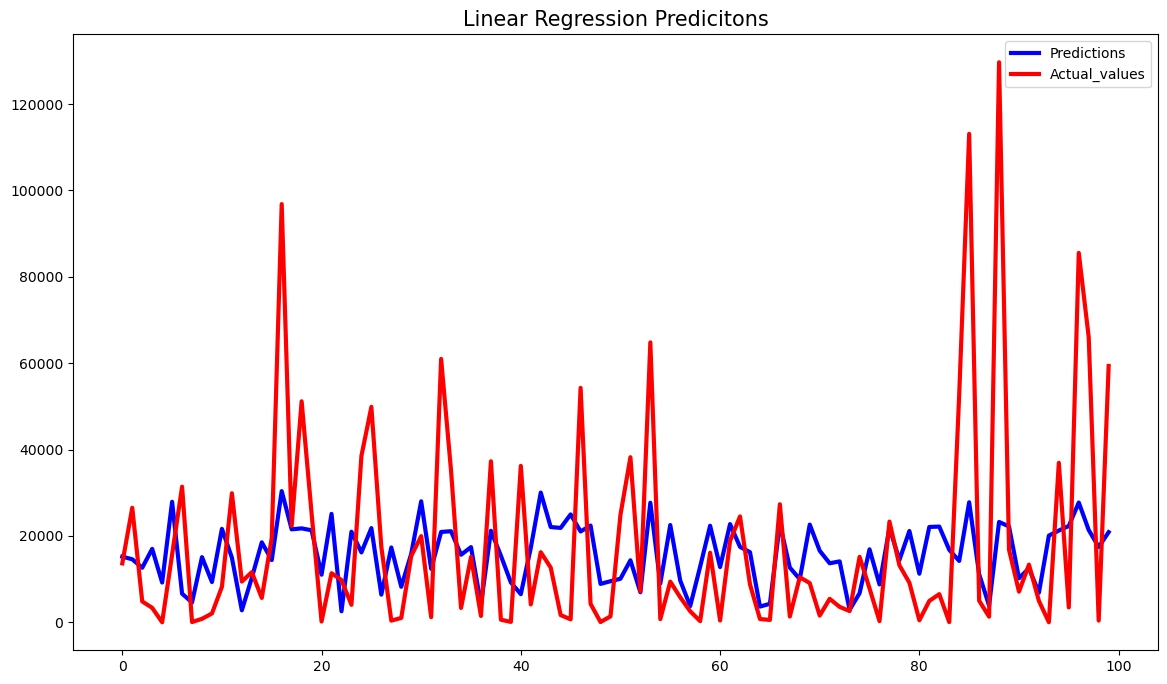

In [73]:
# Visulaizing the Linear regression predictions vs actual values
plt.figure(figsize=(14,8))
plt.title('Linear Regression Predicitons', fontsize=15)
plt.plot(y_pred_5[:100], label="Predictions", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label ="Actual_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.savefig('Linear_Regression.png')
plt.show()

In [74]:
# Training the XGboost Regression model 
xg = xgboost.XGBRegressor()

model_6 = xg.fit(X_train,y_train)

y_pred_6 = model_6.predict(X_test)

mae_6 = mean_absolute_error(y_test, y_pred_6)
r2_score_6 = explained_variance_score(y_test, y_pred_6)
print("MAE" , mae_6)
print("R2" , r2_score_6)

MAE 3210.730522560878
R2 0.9422400305051268


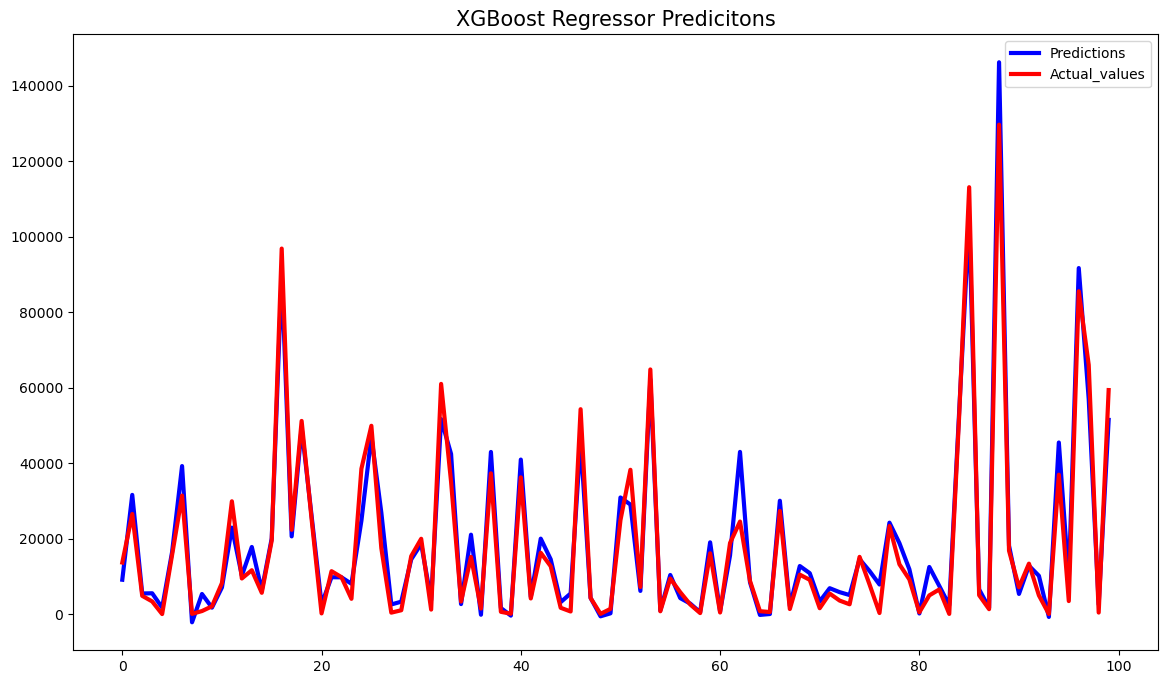

In [75]:
# Visulaizing the XGBoost predictions vs actual values
plt.figure(figsize=(14,8))
plt.title('XGBoost Regressor Predicitons', fontsize=15)
plt.plot(y_pred_6[:100], label="Predictions", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label ="Actual_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.savefig('XGBoost.png')
plt.show()

In [77]:
# Training the knn model on the data
knn = KNeighborsRegressor()

model_8 = knn.fit(X_train,y_train)

y_pred_8 = model_8.predict(X_test)

mae_8 = mean_absolute_error(y_test, y_pred_8)
r2_score_8 = explained_variance_score(y_test, y_pred_8)
print("MAE" , mae_8)
print("R2" , r2_score_8)

MAE 11293.418982723006
R2 0.3684994100692768


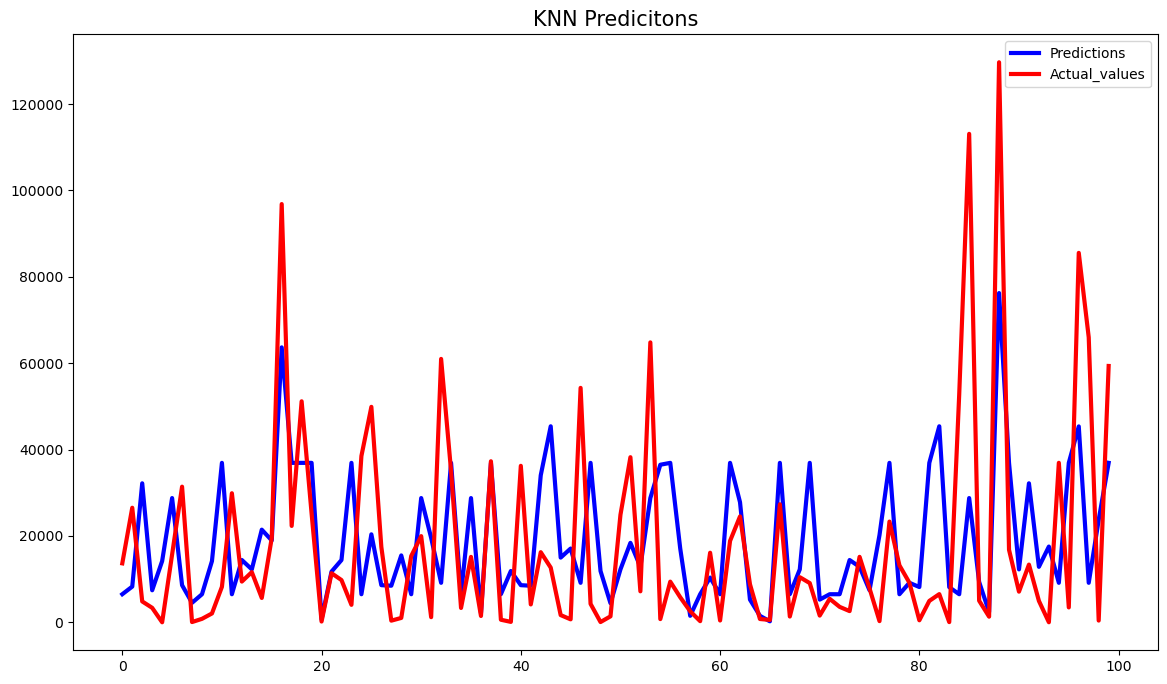

In [78]:
# Visulaizing the knn predictions vs actual values
plt.figure(figsize=(14,8))
plt.title('KNN Predicitons', fontsize=15)
plt.plot(y_pred_8[:100], label="Predictions", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label ="Actual_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.savefig('KNN.png')
plt.show()

In [79]:
df_cleaned.head()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,Total_MarkDown,Type_B,Type_C,Christmas_True,Labor_Day_True,Super_Bowl_True,Thanksgiving_True,IsHoliday_True
1,1,1,2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,5,2,2010,0.0,0,0,0,0,0,0,0
2,15,21,2010-02-05,3253.19,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.0,1,0,0,0,0,0,0
3,15,20,2010-02-05,4606.90,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.0,1,0,0,0,0,0,0
4,15,19,2010-02-05,1381.40,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.0,1,0,0,0,0,0,0
5,15,18,2010-02-05,2239.25,123737,19.83,2.954,131.527903,8.350,5,2,2010,0.0,1,0,0,0,0,0,0


As we can see from the data that Store and Dept are the categorical data though they are numerical. They are considered as nominal data which do not follow any order. So we do the hot encoding on these features

In [80]:
# Hot-encoding on the store and dept columns
categorical_features_new = ["Store", "Dept"]
encoded_data = pd.get_dummies(df_cleaned, columns=categorical_features_new)
encoded_data.head()

,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
1,2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,5,2,2010,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-05,3253.19,123737,19.83,2.954,131.527903,8.350,5,2,2010,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-05,4606.90,123737,19.83,2.954,131.527903,8.350,5,2,2010,...,0,0,0,0,0,0,0,0,0,0
4,2010-02-05,1381.40,123737,19.83,2.954,131.527903,8.350,5,2,2010,...,0,0,0,0,0,0,0,0,0,0
5,2010-02-05,2239.25,123737,19.83,2.954,131.527903,8.350,5,2,2010,...,0,0,0,0,0,0,0,0,0,0


### Splitting the newly encoded data into training and testing

In [81]:
df_train_en = encoded_data[:int(0.75*(len(encoded_data)))]
df_test_en = encoded_data[int(0.75*(len(encoded_data))):]

In [82]:
X_train_en = df_train_en.drop(["Weekly_Sales", "Date"], axis = 1)
X_test_en =  df_test_en.drop(["Weekly_Sales", "Date"], axis = 1)
y_train_en = df_train_en['Weekly_Sales']
y_test_en = df_test_en['Weekly_Sales']

In [83]:
# Training the random forest model on the new encoded data
rf_model5 = RandomForestRegressor()

model_9 = rf_model5.fit(X_train_en , y_train_en)

y_pred_9 = model_9.predict(X_test_en)

mae_9 = mean_absolute_error(y_test, y_pred_9)
r2_score_9 = explained_variance_score(y_test, y_pred_9)
print("MAE" , mae_9)
print("R2" , r2_score_9)

MAE 1862.0963930140026
R2 0.9688082310592299


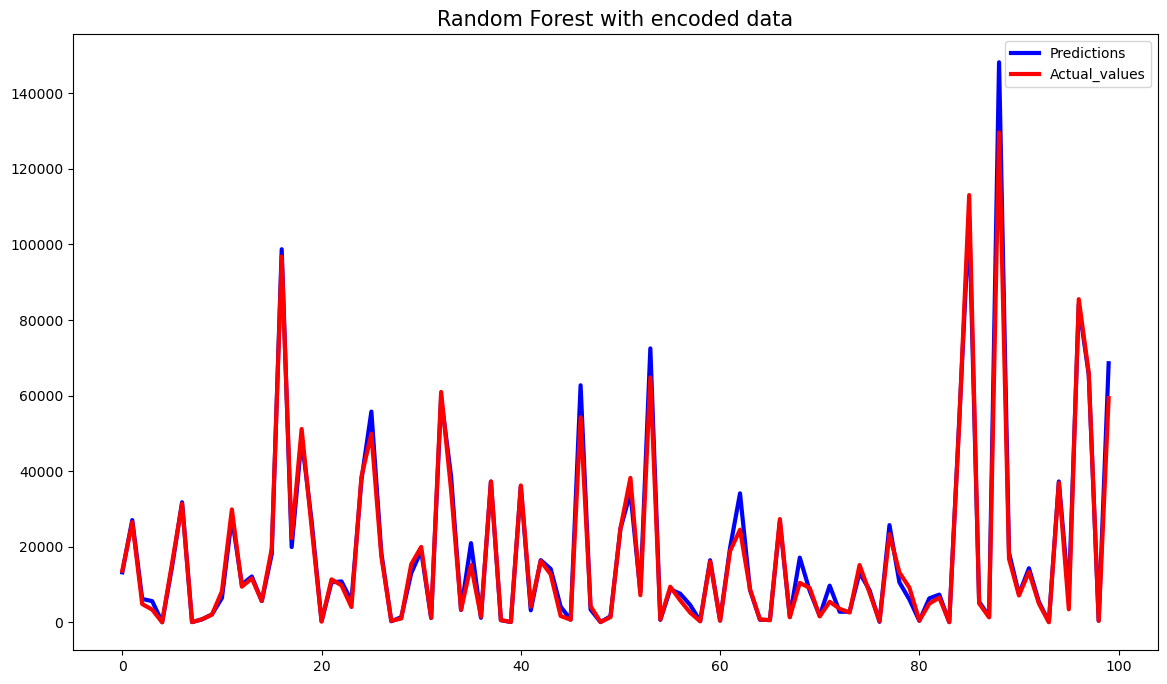

In [84]:
# Visualizing the random forest predictions vs actual values 
plt.figure(figsize=(14,8))
plt.title('Random Forest with encoded data', fontsize=15)
plt.plot(y_pred_9[:100], label="Predictions", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label ="Actual_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.savefig('Rf_Encoded.png')
plt.show()

In [85]:
# Training the xgboost on encoded data
xg2 = xgboost.XGBRegressor()

model_10 = xg.fit(X_train_en,y_train)

y_pred_10 = model_10.predict(X_test_en)

mae_10 = mean_absolute_error(y_test_en, y_pred_10)
r2_score_10 = explained_variance_score(y_test_en, y_pred_10)
print("MAE" , mae_10)
print("R2" , r2_score_10)

MAE 3451.721261671048
R2 0.9352945980542312


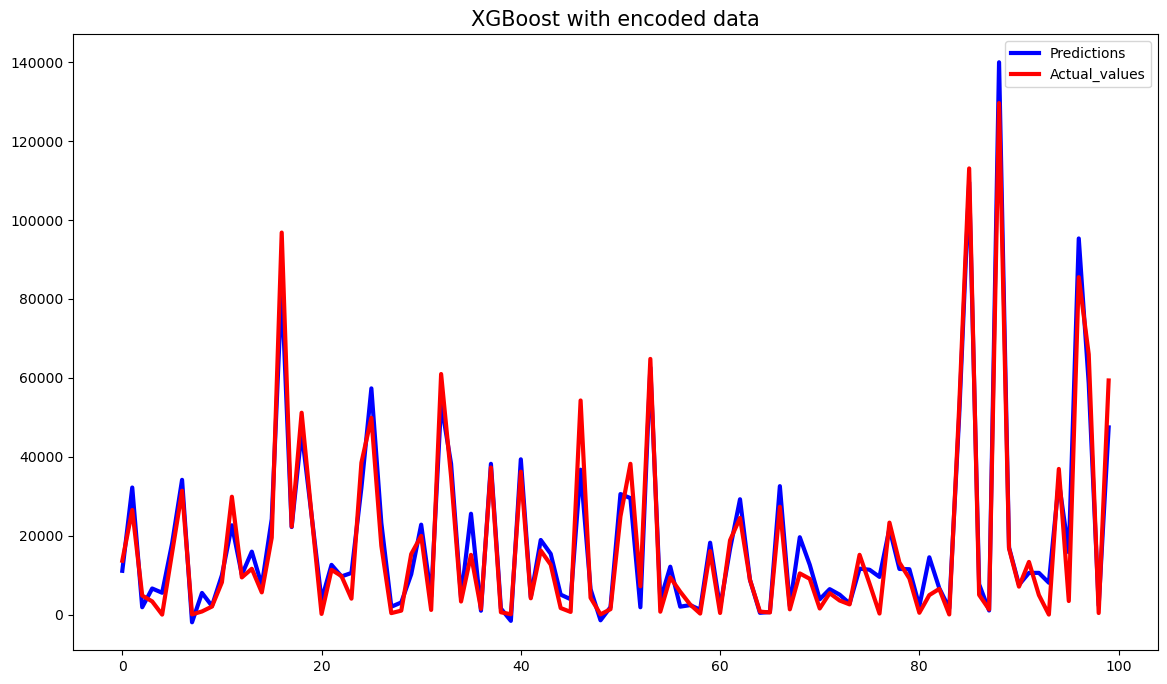

In [86]:
# Visualizing the XGboost preditions vs actual values
plt.figure(figsize=(14,8))
plt.title('XGBoost with encoded data', fontsize=15)
plt.plot(y_pred_10[:100], label="Predictions", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label ="Actual_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.savefig('XGBoost_Encoded.png')
plt.show()

In [87]:
# Creating a dict results to store the mae and r2_score of all the trained models
results = {"Regression Algorithm":["Decision Tree", "Random Forest Default", "Random Forest/Feature Selection", 
                                    "Lasso Regression", "Linear Regression", "XGBoost Regression",
                                   "KNN Regression", "Random Forest/Encoded Data", "XGBoost/Encoded Data"], 
           "Mean Absolute Error" : [mae_1,mae_2,mae_3, mae_4, mae_5, mae_6,mae_8,mae_9,mae_10], 
           "R2 Score": [r2_score_1,r2_score_2,r2_score_3,r2_score_4,r2_score_5,r2_score_6,
                       r2_score_8,r2_score_9,r2_score_10]}

In [88]:
# Displaying the results as dataframe sorted by lowest Mean Absolute Error
results_df = pd.DataFrame(results)
results_df.sort_values("Mean Absolute Error")

,Regression Algorithm,Mean Absolute Error,R2 Score
7,Random Forest/Encoded Data,1862.096393,0.968808
1,Random Forest Default,2045.490658,0.959801
2,Random Forest/Feature Selection,2053.104838,0.959327
0,Decision Tree,2645.063044,0.928300
5,XGBoost Regression,3210.730523,0.942240
8,XGBoost/Encoded Data,3451.721262,0.935295
6,KNN Regression,11293.418983,0.368499
4,Linear Regression,14351.700683,0.095464
3,Lasso Regression,14356.493220,0.095462


From the above results:


### Best Model with lowest mean absolute error is: Random Forest with Encoded Data

In [89]:
# Saving the best trained model using the pickle library

# Importing the pickle library
import pickle

pickle.dump(model_9, open('Best_Model.pkl', 'wb'))